[9196, 6778, 6416, 6160, 6047, 5965, 5482, 5337, 4250, 3659, 3049, 2433, 2307, 2083, 2019, 1887, 1723, 1551, 1521, 1411, 1205, 1166, 1158, 1138, 1034, 980, 973, 972, 932, 719, 707, 664, 648, 641, 624, 595, 590, 583, 582, 561, 531, 505, 502, 481, 460, 447, 432, 415, 408, 374, 364, 349, 347, 347, 344, 335, 322, 317, 315, 314, 308, 303, 299, 293, 293, 286, 281, 274, 271, 270, 266, 258, 248, 247, 245, 242, 242, 238, 236, 232, 231, 229, 226, 217, 213, 209, 207, 205, 204, 199, 197, 195, 194, 188, 184, 178, 175, 175, 175, 174, 174, 169, 169, 168, 167, 164, 160, 159, 159, 157, 153, 153, 153, 152, 150, 150, 150, 149, 148, 147, 145, 145, 142, 142, 140, 140, 138, 133, 133, 131, 131, 129, 128, 126, 125, 124, 124, 124, 121, 119, 118, 118, 118, 117, 117, 116, 116, 116, 115, 115, 113, 111, 110, 110, 109, 108, 108, 107, 107, 107, 107, 107, 106, 104, 104, 104, 102, 102, 101, 100, 100, 100, 100, 99, 99, 99, 99, 98, 98, 97, 96, 95, 95, 94, 94, 93, 93, 93, 90, 90, 90, 89, 89, 88, 88, 88, 88, 87, 87, 86, 8

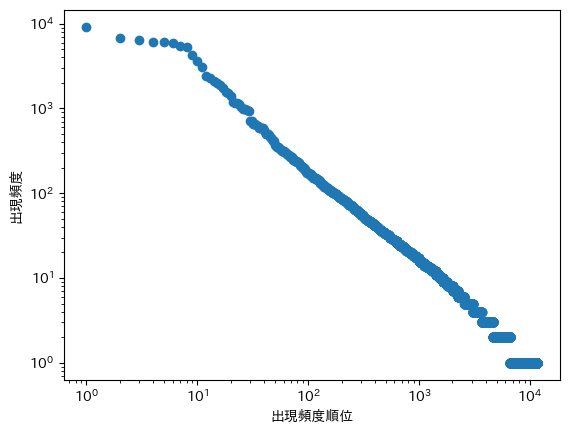

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib_fontja                              #plt日本語表示用のモジュール

def read_mecab(file):
    results = []
    sentence = []
    with open(file,"r") as f:
        for line in f:                                 #ファイルから1行ずつ読み込んで処理
            if line == 'EOS\n':                        #EOSで文の終わりを判定
                if len(sentence) != 0:                 #sentenceに要素が入っていれば結果に格納
                    results.append(sentence)
                    sentence = []                      #sentenceをリセット
            else:                                      #EOS出なけらば各文に対して以下の処理を行う
                morpheme1 = line.split('\t')           #表層形の取得
                morpheme2 = morpheme1[1].split(',')    #各種形態素の取得
                words = {'surface':morpheme1[0],       #単語ごとに辞書に格納
                         'base':morpheme2[6],
                         'pos':morpheme2[0],
                         'pos1':morpheme2[1]}
                sentence.append(words)
    
    if len(sentence) != 0:                             #余りの分の処理
        results.append(sentence)
        sentence = []
    
    return results

file = 'neko.txt.mecab'
results = read_mecab(file)
count = []
for sentence in results:
    for word in sentence:
        if word['pos'] != '記号':                      #記号以外の単語を集める
            count.append(word['base'])

c = Counter(count)                                     #collection.Counterで数える
ans = c.values()                                       #valisメソッドで全単語の出現回数のみを取得
ans = sorted(list(ans),reverse=True)                   #出現回数の降順に並べ替える
order = list(range(1,len(ans)+1))                      #横軸用のorder

fig,ax = plt.subplots()                               
ax.scatter(order,ans)                                  #scatterで散布図の描画
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()